# Interest Rate prediction (Classification and Unsupervised Learning).

###### Import libraries

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv('Data/master.csv')
train = pd.read_csv('Data/capstone_train.csv')
data.head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Gender,Mortgage_on_house,Number_Closed_Accounts,Annual_Income_Amt_Req,Interest_Rate
0,10+,Mortgage,verified,liability,13.0,0.0,poor,Male,Yes,27.0,4.690909,2
1,10+,Rent,not verified,liability,11.0,0.0,good,Male,No,17.0,4.230769,3
2,0-1,Rent,verified,liability,7.0,2.0,good,Male,No,15.0,12.345679,3
3,10+,Mortgage,verified,liability,8.0,0.0,good,Male,Yes,2.0,6.083333,2
4,6-9,Mortgage,verified,asset,0.0,2.0,good,Female,Yes,1.0,4.929000,2


In [16]:
#Map to convert from categorical to numerical
cat_cols = data.select_dtypes('object').columns
cat_cols_map = {}
for i in data.select_dtypes('object'):
    temp = data[i].dropna().unique()
    d = dict(zip(temp,list(range(len(temp)))))
    cat_cols_map.setdefault(i,d)

In [20]:
for i in cat_cols:
    data[i] = data[i].map(cat_cols_map[i])
data.head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Gender,Mortgage_on_house,Number_Closed_Accounts,Annual_Income_Amt_Req,Interest_Rate
0,0,0,0,0,13.0,0.0,0,0,0,27.0,4.690909,2
1,0,1,1,0,11.0,0.0,1,0,1,17.0,4.230769,3
2,1,1,0,0,7.0,2.0,1,0,1,15.0,12.345679,3
3,0,0,0,0,8.0,0.0,1,0,0,2.0,6.083333,2
4,2,0,0,1,0.0,2.0,1,1,0,1.0,4.929000,2


In [23]:
data1 = data.drop('Interest_Rate',axis = 1)

###### Standardizing the dataset for KMeans

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test_scaled = pd.DataFrame(ss.fit_transform(data1),columns = data1.columns)

### Applying KMeans clustering

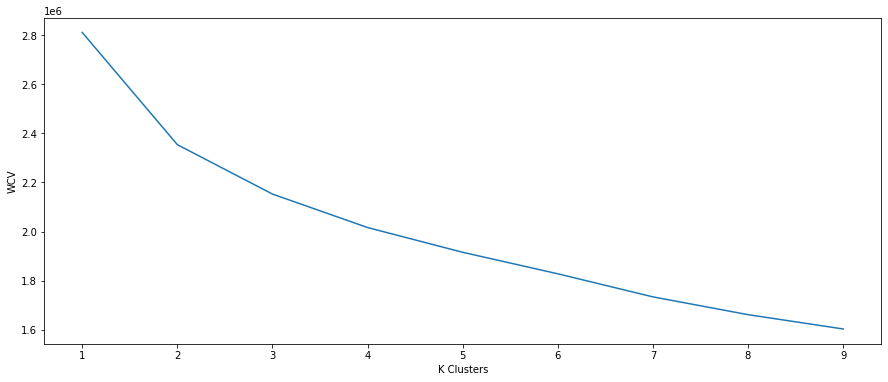

In [27]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(test_scaled)
    wcv.append(km.inertia_)
plt.figure(figsize = (15,6))
plt.plot(range(1,10),wcv)
plt.xlabel('K Clusters')
plt.ylabel('WCV')
plt.show()

### Applying KMeans with PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(test_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
np.where(cumsum>0.95)[0][1]

10

In [29]:
pca = PCA(n_components = 0.95)
X_pca = pd.DataFrame(pca.fit_transform(test_scaled))

In [30]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.001544,-0.597224,-0.577443,0.186114,-0.576017,1.981498,0.212387,-0.244126,1.836224,-0.292109
1,0.833982,0.138806,-0.228611,-1.435688,-0.712977,0.998409,0.414535,-1.178441,0.559777,-0.840487
2,0.699764,0.510974,0.902417,0.816721,-0.535684,0.419960,-0.557187,-1.368868,0.883311,0.944240
3,-1.184627,0.214226,-1.649982,-0.269009,-0.664384,0.980198,-1.550461,-0.599603,-0.249788,0.688007
4,-0.855170,1.614415,-1.176962,1.756466,1.694171,-0.370858,-2.014152,-0.751615,-0.236036,-0.311919


###### Applying KMeans

In [45]:
km = KMeans(n_clusters = 3)
km.fit(X_pca)
target_kmeans = pd.Series(km.predict(X_pca),name = 'Interest_Rate2')

In [66]:
data2 = pd.concat((data,target_kmeans),axis = 1)

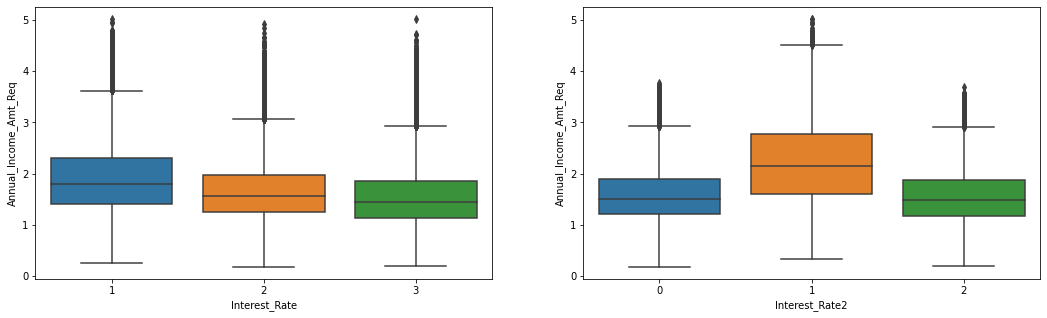

In [67]:
fig,ax = plt.subplots(1,2,figsize = (18,5))
sns.boxplot(data2['Interest_Rate'],np.log(data2['Annual_Income_Amt_Req']),ax = ax[0])
sns.boxplot(data2['Interest_Rate2'],np.log(data2['Annual_Income_Amt_Req']),ax = ax[1])
plt.show()

In [68]:
#0:2
#1:1
#2:3
data2['Interest_Rate2'] = data2['Interest_Rate2'].map(dict(zip([0,1,2],[2,1,3])))

In [69]:
data2 = data2.drop('Interest_Rate',axis = 1)
data2 = data2.rename({'Interest_Rate2':'Interest_Rate'},axis = 1)

### Train test split

In [73]:
X = data2.drop('Interest_Rate',axis = 1)
y = data2['Interest_Rate']
X.head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Gender,Mortgage_on_house,Number_Closed_Accounts,Annual_Income_Amt_Req
0,0,0,0,0,13.0,0.0,0,0,0,27.0,4.690909
1,0,1,1,0,11.0,0.0,1,0,1,17.0,4.230769
2,1,1,0,0,7.0,2.0,1,0,1,15.0,12.345679
3,0,0,0,0,8.0,0.0,1,0,0,2.0,6.083333
4,2,0,0,1,0.0,2.0,1,1,0,1.0,4.929000


In [74]:
#train test split for normal data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 6)

###### Standardized X y split

In [76]:
#Standardized X y split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X_scaled.head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Gender,Mortgage_on_house,Number_Closed_Accounts,Annual_Income_Amt_Req
0,-1.235956,-1.003731,-0.693451,-0.432584,-0.547321,-0.749698,-1.945139,-0.635610,-1.177843,1.682286,-0.297730
1,-1.235956,0.584843,1.442063,-0.432584,-0.803406,-0.749698,-0.364357,-0.635610,0.849010,0.463610,-0.373017
2,-0.417968,0.584843,-0.693451,-0.432584,-1.315577,1.207704,-0.364357,-0.635610,0.849010,0.219875,0.954731
3,-1.235956,-1.003731,-0.693451,-0.432584,-1.187535,-0.749698,-0.364357,-0.635610,-1.177843,-1.364404,-0.069904
4,0.400019,-1.003731,-0.693451,1.159573,-2.211877,1.207704,-0.364357,1.573292,-1.177843,-1.486272,-0.258774


In [77]:
#train test split for standardized data
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X_scaled,y,test_size = 0.1,random_state = 6)

### Model Building

###### Building the following Models:
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1_train,y1_train)
ypred = lr.predict(X1_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y1_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2917
           2       1.00      1.00      1.00     10134
           3       1.00      1.00      1.00     12497

    accuracy                           1.00     25548
   macro avg       1.00      1.00      1.00     25548
weighted avg       1.00      1.00      1.00     25548



###### Creating a base  function for all models

In [80]:
def model_function(model,X_train,X_test,y_train,y_test):
    #Fitting the model
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('*'*95)
    print("\n"+"\033[1m"+'Model Report for '+str(model)+"\033[0;0m"+"\n")
    print('*'*95)

    #Performance metrics
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Confusion_Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (15,6))
    sns.heatmap(cm,annot = True,fmt = '.2f')
    plt.title('Confusion Matrix')
    plt.xticks([0.5,1.5,2.5],[1,2,3])
    plt.yticks([0.5,1.5,2.5],[1,2,3])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def grid_search(estimator,params,X_train,y_train,cv=5,v=0):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(estimator,params,scoring = 'roc_auc',n_jobs = -1,cv = cv,verbose = v)
    grid.fit(X_train,y_train)
    return grid.best_params_

***********************************************************************************************

Model Report for DecisionTreeClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2911
           2       1.00      1.00      1.00     10138
           3       1.00      1.00      1.00     12499

    accuracy                           1.00     25548
   macro avg       0.99      0.99      0.99     25548
weighted avg       1.00      1.00      1.00     25548



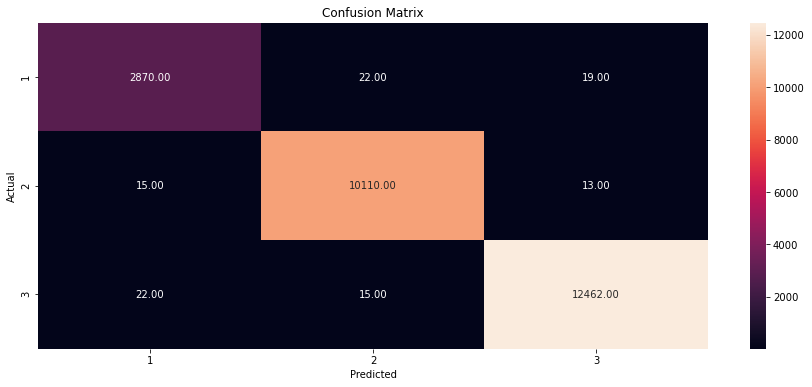

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
model_function(dtf,X_train,X_test,y_train,y_test)

***********************************************************************************************

Model Report for RandomForestClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2911
           2       1.00      1.00      1.00     10138
           3       1.00      1.00      1.00     12499

    accuracy                           1.00     25548
   macro avg       1.00      1.00      1.00     25548
weighted avg       1.00      1.00      1.00     25548



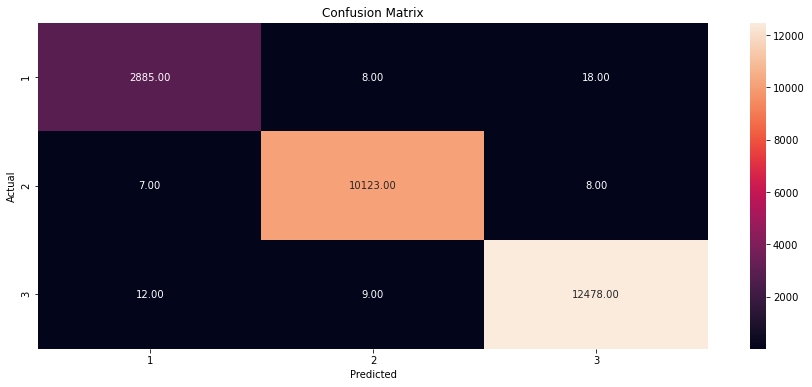

In [82]:
#Base model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_function(rfc,X_train,X_test,y_train,y_test)

***********************************************************************************************

Model Report for GradientBoostingClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      2911
           2       1.00      1.00      1.00     10138
           3       1.00      1.00      1.00     12499

    accuracy                           1.00     25548
   macro avg       1.00      0.99      0.99     25548
weighted avg       1.00      1.00      1.00     25548



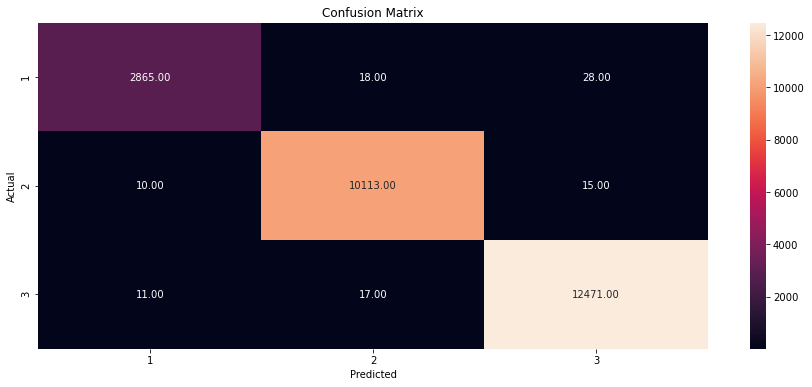

In [83]:
#Base GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_function(gbc,X_train,X_test,y_train,y_test)